# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: Rosset

Student name: Lorenzo
    
ID: 2021859

In [64]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [65]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [66]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2021858
np.random.seed(ID)

In [67]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [68]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [57 56 65 63 68 55 56 56 57 67]


In [69]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


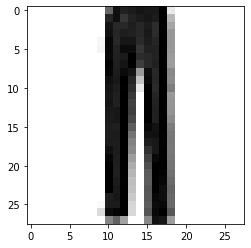

LABEL: 1
INPUT:


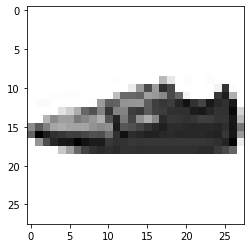

LABEL: 7
INPUT:


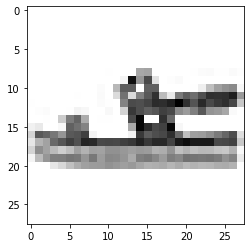

LABEL: 5
INPUT:


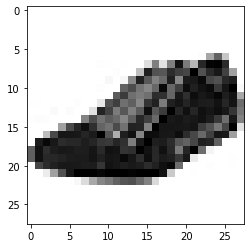

LABEL: 7


In [70]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [71]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#train linear SVM
svc = SVC(kernel='linear')
gscv = GridSearchCV(svc, parameters)
gscv.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
print(gscv.best_params_)

print("Score with best parameters:")
print(gscv.best_score_)

print("All scores on the grid:")
all_params = pd.DataFrame(gscv.cv_results_).loc[:, ['param_C', 'rank_test_score', 'mean_test_score']]
all_params

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.1}
Score with best parameters:
0.7733333333333333
All scores on the grid:


,param_C,rank_test_score,mean_test_score
0,0.001,6,0.598333
1,0.01,5,0.748333
2,0.1,1,0.773333
3,1,2,0.758333
4,10,2,0.758333
5,100,2,0.758333


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [72]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel

svc = SVC(kernel='poly', degree=2)
gscv = GridSearchCV(svc, parameters)
gscv.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(gscv.best_params_)

print("Score with best parameters:")
print(gscv.best_score_)

print("\nAll scores on the grid:")
all_params = pd.DataFrame(gscv.cv_results_).loc[:, ['param_C', 'param_gamma', 'rank_test_score', 'mean_test_score']]
all_params

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.5, 'gamma': 0.05}
Score with best parameters:
0.7683333333333333

All scores on the grid:


,param_C,param_gamma,rank_test_score,mean_test_score
0,0.05,0.05,9,0.746667
1,0.05,0.5,2,0.753333
2,0.05,5,2,0.753333
3,0.5,0.05,1,0.768333
4,0.5,0.5,2,0.753333
5,0.5,5,2,0.753333
6,5,0.05,2,0.753333
7,5,0.5,2,0.753333
8,5,5,2,0.753333


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 4th degree).

In [73]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 4

svc = SVC(kernel='poly', degree=degree)
gscv = GridSearchCV(svc, parameters)
gscv.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
print(gscv.best_params_)

print("Score with best parameters:")
print(gscv.best_score_)

print("\nAll scores on the grid:")
all_params = pd.DataFrame(gscv.cv_results_).loc[:, ['param_C', 'param_gamma', 'rank_test_score', 'mean_test_score']]
all_params

RESULTS FOR POLY DEGREE= 4  KERNEL
Best parameters set found:
{'C': 0.05, 'gamma': 0.5}
Score with best parameters:
0.7066666666666668

All scores on the grid:


,param_C,param_gamma,rank_test_score,mean_test_score
0,0.05,0.05,9,0.691667
1,0.05,0.5,1,0.706667
2,0.05,5,1,0.706667
3,0.5,0.05,1,0.706667
4,0.5,0.5,1,0.706667
5,0.5,5,1,0.706667
6,5,0.05,1,0.706667
7,5,0.5,1,0.706667
8,5,5,1,0.706667


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [74]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel

svc = SVC(kernel='rbf')
gscv = GridSearchCV(svc, parameters)
gscv.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(gscv.best_params_)

print("Score with best parameters:")
print(gscv.best_score_)

print("\nAll scores on the grid:")
all_params = pd.DataFrame(gscv.cv_results_).loc[:, ['param_C', 'param_gamma', 'rank_test_score', 'mean_test_score']]
all_params

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 5, 'gamma': 0.005}
Score with best parameters:
0.78

All scores on the grid:


,param_C,param_gamma,rank_test_score,mean_test_score
0,0.5,0.005,7,0.738333
1,0.5,0.05,8,0.703333
2,0.5,0.5,13,0.115000
3,0.5,5,9,0.178333
4,5,0.005,1,0.780000
5,5,0.05,4,0.740000
6,5,0.5,10,0.121667
7,5,5,13,0.115000
8,50,0.005,2,0.773333
9,50,0.05,4,0.740000


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

The rbf kernel is the best one, as expected. Surprisingly, the linear kernel (which is the simplest one) has a score very close to the best one. We therfore observe that not always adding complexity to the model leads to better performance, even if we take care of overfitting issues throught the parameters $C$ and $\gamma$.

## TO DO 5
Report here the best SVM kernel and parameters

In [75]:
#get training and test error for the best SVM model from CV
best_SVM = gscv.best_estimator_
train_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)

# (error is 1 - svm.score)

print ("Best SVM training error: %f" % train_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.043333
Best SVM test error: 0.206500


## TO DO 6

Analyze how the classification boundaries depend on the C parameter

In [76]:
# Function to plot the data and classification boundaries. 


def plot_data(model, X_train, y_train, X_test, y_test, train_error, test_error):

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - abs(0.1*x.min()), x.max() + abs(0.1*x.min())
        y_min, y_max = y.min() - abs(0.1*y.min()), y.max() + abs(0.1*y.min())
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    
    
    # Plot
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    # Training set
    X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title('Training data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],train_error))
    
    # Test set
    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[1], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[1].scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title('Test data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],test_error))
    
    plt.show()

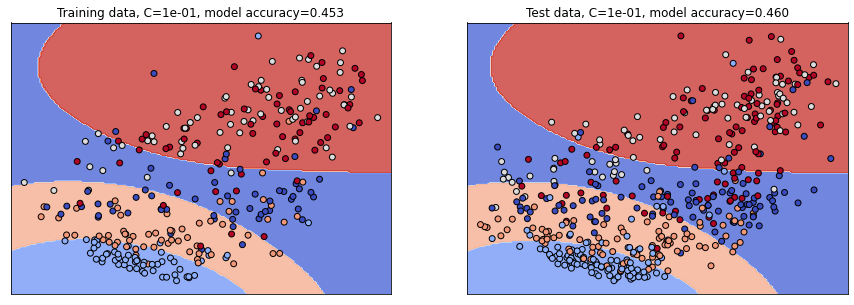

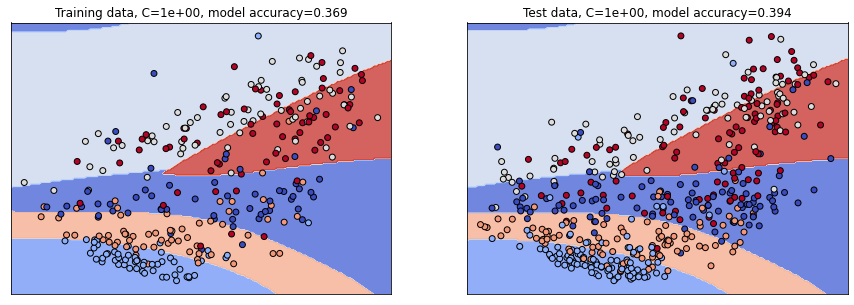

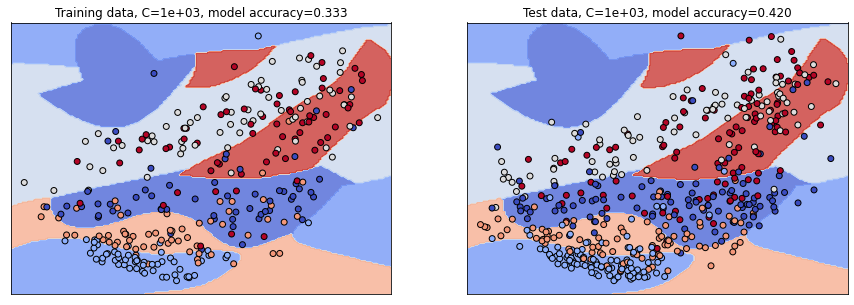

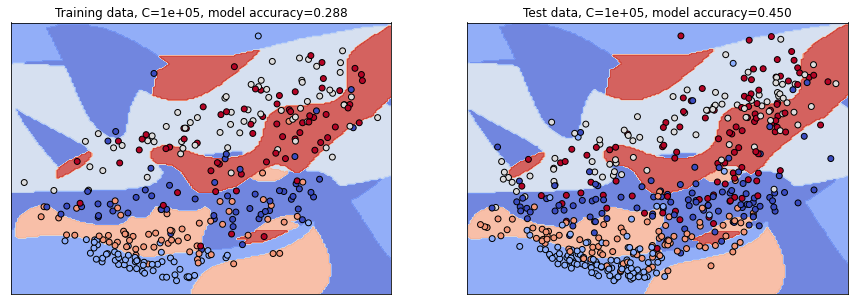

In [77]:
# Too many test samples for visualization, plot only some of them
m_test = 1000
p = np.random.permutation(X_test.shape[0])[:m_test]
X_test_red, y_test_red = X_test[p,:], y_test[p]

# Perform classification only on subset of original classes for better visualization

class_list = [0,1,2,3,4] #YOU CAN TRY TO CHANGE THE CLASSES

train_idxs = [i for i in range(len(y_train)) if y_train[i] in class_list]   
test_idxs = [i for i in range(len(y_test_red)) if y_test_red[i] in class_list] 
X_train_plot = X_train[train_idxs,:]
X_test_plot = X_test_red[test_idxs,:] 
y_train_plot = y_train[train_idxs]
y_test_plot = y_test_red[test_idxs] 


# The dimensionality is reduced to 2 for visualization using PCA
# PCA: Reduce the dimensionality trying to preserve the information content. 
# PCA will be the topic of one of the very last lectures

# Reduce X dimensionality to 2 for visualization
pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca, X_test_pca = pca.transform(X_train_plot), pca.transform(X_test_plot)


C_list = [1e-1, 1, 1e3, 1e5]
gamma = 0.5

# Fit the prediction model on train_plot data futher reduced with PCA, 
# then classify with different prediction models and plot data
# Use RBF kernel 

for C in C_list:
    my_svm = SVC(kernel='rbf', C=C, gamma=gamma)
    
    my_svm.fit(X_train_pca, y_train_plot)
    train_error, test_error = 1-my_svm.score(X_train_pca, y_train_plot), 1-my_svm.score(X_test_pca, y_test_plot)
    
    plot_data(my_svm, X_train_pca, y_train_plot, X_test_pca, y_test_plot, train_error, test_error)

## QUESTION 2
How do the shape of the boundaries changes when trying different values of C ?

As $C$ increases, the shape of the boundaries becomes more and more intricate. This leads to better performance on the training set, but reduces the robustness of the model.

## TO DO 7

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [78]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)

[  0.     0.     0.     0.01   0.1    1.    10.   100.  ]


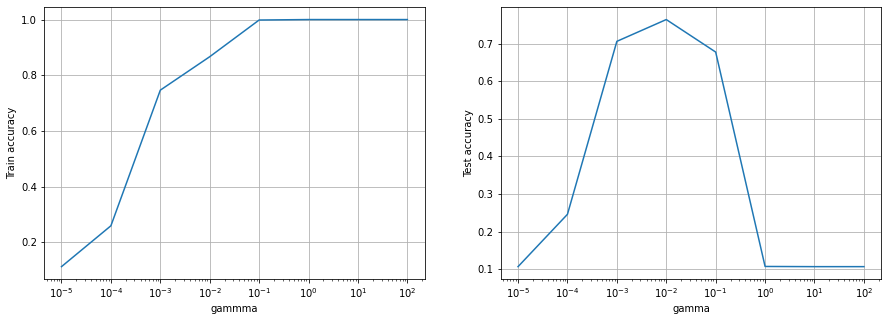

In [79]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

svc = SVC(kernel='rbf')
for gamma in gamma_values:
    svc.set_params(C=1, gamma=gamma)
    svc.fit(X_train, y_train)
    train_acc_list.append(svc.score(X_train, y_train))
    test_acc_list.append(svc.score(X_test, y_test))

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gammma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 3
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

As $\gamma$ increases the trainig accurancy increases too, until it saturates. This means that the model becomes more and more detailed in classifying the training set. On the other hand when we apply the model found to the test set we find that there is a compromise between a too rough classification and a very detailed (on the training set) one.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [80]:
X = X[permutation]
y = y[permutation]

m_training = 1500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [146 148 168 169 146 145 144 152 143 139]


## TO DO 8

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [81]:
#get training and test error for the best SVM model from CV

import time
t_start = time.perf_counter()

parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}
svc = SVC(kernel='rbf')
gscv = GridSearchCV(svc, parameters)
gscv.fit(X_train, y_train)

t_end = time.perf_counter()

best_svc = gscv.best_estimator_
training_error = 1 - best_svc.score(X_train, y_train)
test_error = 1 - best_svc.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

total_time = t_end - t_start
t_min = int(total_time/60)
t_sec = total_time - t_min*60
print('\nTime: {} min, {:.1f} sec'.format(t_min, t_sec))

Best SVM training error: 0.073333
Best SVM test error: 0.171402

Time: 3 min, 21.0 sec


Just for comparison, let's also use logistic regression 

## TO DO 9 Try first without regularization (use a very large large C)¶

In [82]:
from sklearn import linear_model

log_reg = linear_model.LogisticRegression(C=1e9, max_iter=1000)
log_reg.fit(X_train, y_train)
training_error = 1 - log_reg.score(X_train, y_train)
test_error = 1 - log_reg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.212598


## TO DO 10 Try  with regularization (use C=1)¶

In [83]:
log_reg.set_params(C=1)
log_reg.fit(X_train, y_train)
training_error = 1 - log_reg.score(X_train, y_train)
test_error = 1 - log_reg.score(X_test, y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.006667
Best regularized logistic regression test error: 0.193402


## QUESTION 4
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

We see that using a larger training set leads to lower performances on the training set (training errors: 0.04 vs 0.07) but on the other hand it makes the model more robust, as we can see from the test error (test errors: 0.21 vs 0.17).
In general, we can notice that logistic regression tends to overfit more the data, because even if we introduce the regularization (case C=1) we find a lower training error and a larger test error with respect to the ones we find using SVM (trainig errors: 0.007 vs 0.07, test errors: 0.19 vs 0.17). Nevertheless, the advantage of the logistic regression is that it takes much less time to be performed.
Finally, it is clear that it is important to introduce the regularization on logistic regression, otherwise we run into the overfitting problem.

## TO DO 11
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


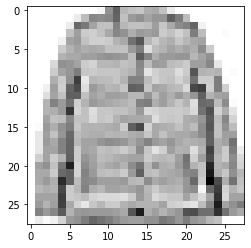

LABEL: 4


In [84]:
X_reduced = X[:1000]
y_reduced = y[:1000]

LR_prediction = best_svc.predict(X_reduced)
SVM_prediction = log_reg.predict(X_reduced)
wrong_index = np.argwhere(np.array(LR_prediction == y_reduced) == False).flatten()
correct_index = np.argwhere(np.array(SVM_prediction == y_reduced) == True).flatten()
index = 0
for i in wrong_index:
    if i in correct_index:
        index = i
        break
plot_input(X_reduced, y_reduced, index)

## TO DO 12
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [85]:
u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

LR_prediction = best_svc.predict(X)
SVM_prediction = log_reg.predict(X)

confusion_SVM = skm.confusion_matrix(y, SVM_prediction)
confusion_LR =  skm.confusion_matrix(y, LR_prediction)

Labels and frequencies in test set:  [5854 5852 5832 5831 5854 5855 5856 5848 5857 5861]


<ipython-input-86-688792e99c32>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


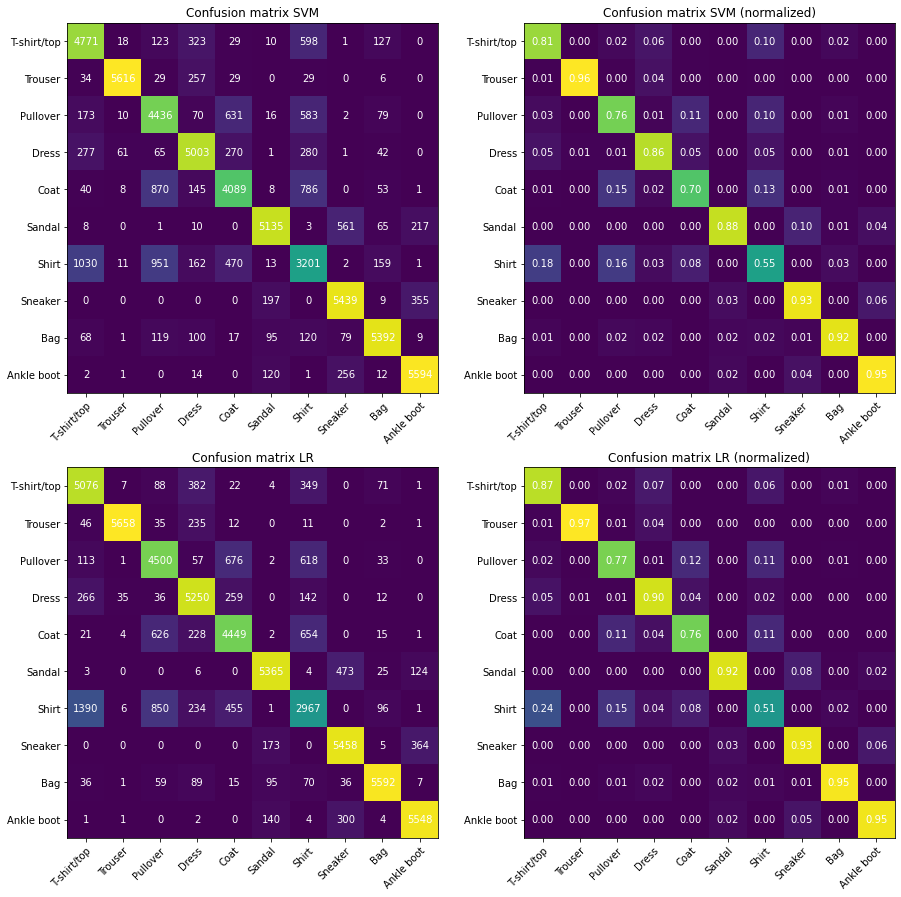

In [86]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

def mkplot(a_ax, x, y, mat, labels, title, norm=False):
    ax = a_ax[x, y]
    indexes = np.arange(len(labels))
    ax.set_title(title)
    ax.imshow(mat)
    ax.set_xticks(indexes)
    ax.set_yticks(indexes)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    if norm :
        for i in indexes:
            for j in indexes:
                ax.text(j, i, '{:.2f}'.format(mat[i,j]), ha='center', va='center', color='w')
    else:
        for i in indexes:
            for j in indexes:
                ax.text(j, i, mat[i,j], ha='center', va='center', color='w')
            
mkplot(ax, 0, 0, confusion_SVM, labels, 'Confusion matrix SVM')
mkplot(ax, 0, 1, confusion_SVM / counts[:,None], labels, 'Confusion matrix SVM (normalized)', True)
mkplot(ax, 1, 0, confusion_LR, labels, 'Confusion matrix LR')
mkplot(ax, 1, 1, confusion_LR / counts[:,None], labels, 'Confusion matrix LR (normalized)', True)
fig.show()

## QUESTION 5
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


It is clear that very different objects are more likely to be distinguished, while with more similar ones some errors can occour. For example, it never happens that a sneaker is classified as a garment, but sometimes it is wrongly classified as an ankle boot.